In [1]:
from process_image import *
from model_nn import *

In [2]:
input_directory = "../Dataset/Foto_Resize_50x50" 
X_train, y_train, X_test, y_test, X_val, y_val, scalerinput = process_all(input_directory)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

Found folders: ['Azmira', 'David', 'Dimas', 'Fadhli', 'Fadlin', 'Hafidz', 'Haidar', 'Hanna', 'Keiko', 'Khansa', 'Mikhael', 'Puti', 'Raesa', 'Satwika', 'Toni']
(209, 2500) (209, 15) (45, 2500) (45, 15) (45, 2500) (45, 15)


In [3]:
model_50 = FaceRecognitionModel(X_train.shape[1], [64], y_train.shape[1])

In [4]:
error_train, error_val = model_50.train(X_train, y_train, X_val, y_val, epochs=5000, learning_rate=0.01, optimizer='adam', generate_new_params=True)

Params rewritten
Epoch 0, Training Loss: 3.311e+00, Validation Loss: 1.644e+01, Patience: 0, Learning Rate: 0.01
Epoch 1, Training Loss: 1.615e+01, Validation Loss: 1.556e+01, Patience: 0, Learning Rate: 0.01
Epoch 2, Training Loss: 1.481e+01, Validation Loss: 1.515e+01, Patience: 0, Learning Rate: 0.01
Epoch 3, Training Loss: 1.491e+01, Validation Loss: 1.464e+01, Patience: 0, Learning Rate: 0.01
Epoch 4, Training Loss: 1.385e+01, Validation Loss: 1.325e+01, Patience: 0, Learning Rate: 0.01
Epoch 5, Training Loss: 1.228e+01, Validation Loss: 1.250e+01, Patience: 0, Learning Rate: 0.01
Epoch 6, Training Loss: 1.330e+01, Validation Loss: 1.052e+01, Patience: 0, Learning Rate: 0.01
Epoch 7, Training Loss: 1.176e+01, Validation Loss: 8.987e+00, Patience: 0, Learning Rate: 0.01
Epoch 8, Training Loss: 1.041e+01, Validation Loss: 8.438e+00, Patience: 0, Learning Rate: 0.01
Epoch 9, Training Loss: 9.510e+00, Validation Loss: 9.369e+00, Patience: 1, Learning Rate: 0.01
Epoch 10, Training Loss

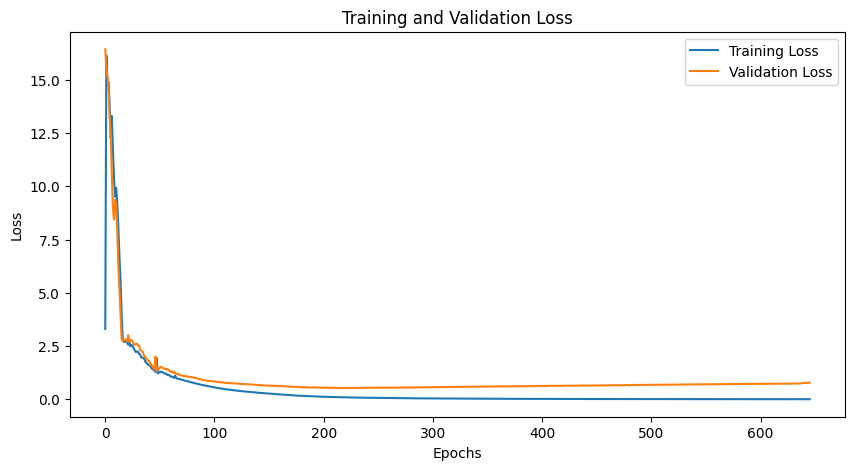

In [5]:
model_50.plot_training_error(error_train, error_val)

In [6]:
y_pred = model_50.test(X_test, y_test)
print(X_test.shape, y_test.shape, y_pred.shape)

Test Loss: 0.9021263063598762
(45, 2500) (45, 15) (45, 15)


In [ ]:
model_50.add_labels_from_folders(input_directory)
model_50.evaluate_metrics(X_test, y_test)

ValueError: shapes (45,15) and (2500,64) not aligned: 15 (dim 1) != 2500 (dim 0)

In [ ]:
model_50.plot_confusion_matrix(X_test, y_test)

In [12]:
model_50.save_model("./My_Model/01_Yi_Sang_50x50_01.pkl")